In [1]:
import tensorflow as tf
import pandas as pd
import os 
import glob
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
from zipfile import ZipFile

In [4]:
with ZipFile("clothing-dataset-small.zip", 'r') as zObject: 
  
    # Extracting all the members of the zip  
    # into a specific location. 
    zObject.extractall(path="C:\\Users\\gaura\\Documents\\GitHub\\Scaler-Projects\\Computer Vision\\Introduction to Computer Vision(CNN)\\data") 

In [5]:
path = "C:\\Users\\gaura\\Documents\\GitHub\\Scaler-Projects\\Computer Vision\\Introduction to Computer Vision(CNN)\\data\\clothing-dataset-small"
class_dict = os.listdir(path+"\\"+"train")

image_dict = {}
count_dict = {}

for cls in class_dict:
    file_path = glob.glob(f'C:\\Users\\gaura\\Documents\\GitHub\\Scaler-Projects\\Computer Vision\\Introduction to Computer Vision(CNN)\\data\\clothing-dataset-small\\train\\{cls}\\*')
    count_dict[cls] = len(file_path)

    image_path = random.choice(file_path)

    image_dict[cls] =  tf.keras.utils.load_img(image_path)


In [6]:
image_dict

{'dress': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x533>,
 'hat': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x534>,
 'longsleeve': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x533>,
 'outwear': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x533>,
 'pants': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x533>,
 'shirt': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x534>,
 'shoes': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x534>,
 'shorts': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x533>,
 'skirt': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=533x400>,
 't-shirt': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x534>}

In [7]:
count_dict

{'dress': 241,
 'hat': 123,
 'longsleeve': 455,
 'outwear': 184,
 'pants': 468,
 'shirt': 290,
 'shoes': 198,
 'shorts': 202,
 'skirt': 112,
 't-shirt': 795}

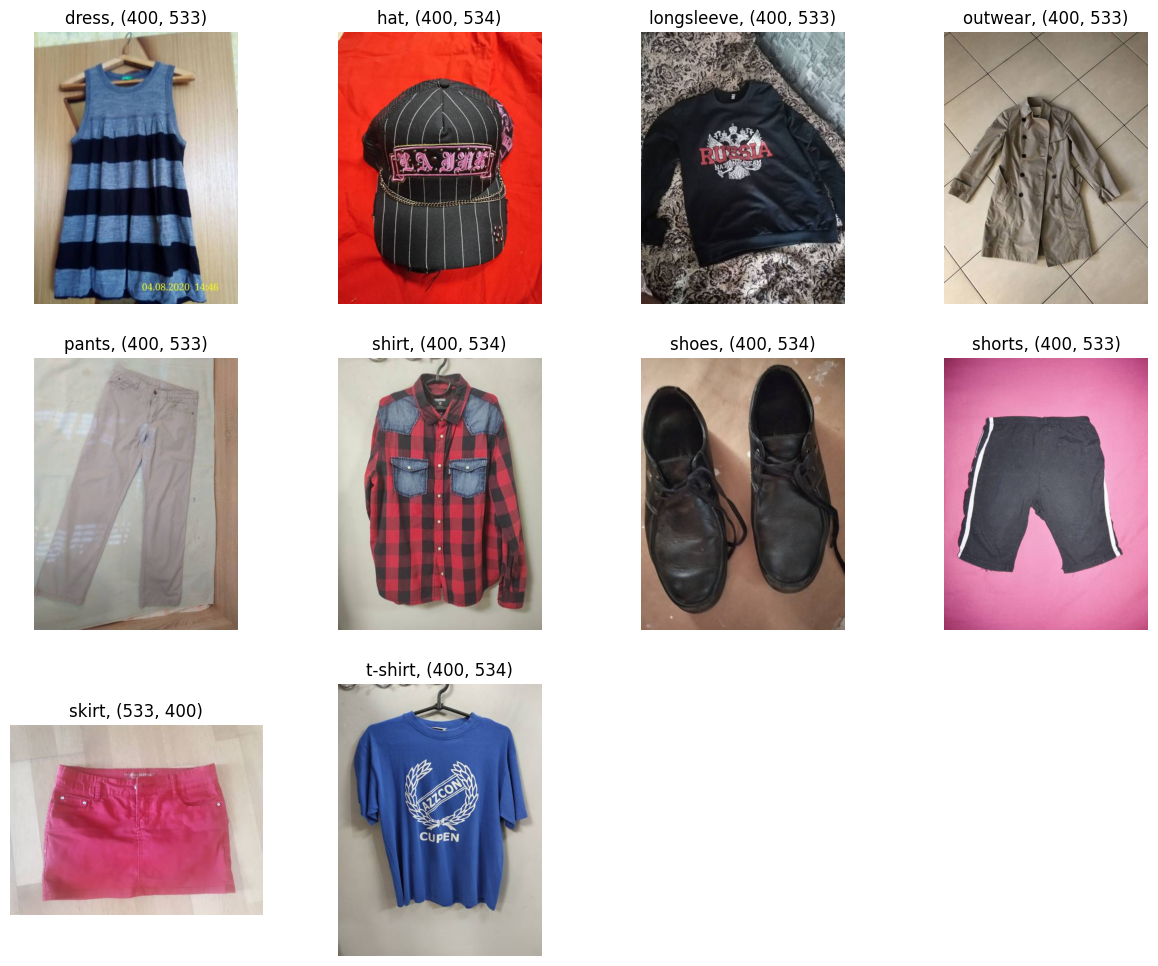

In [8]:
plt.figure(figsize=(15,12))
for i, (cls,img) in enumerate(image_dict.items()):
    plt.subplot(3,4,i+1)
    plt.imshow(img)

    plt.title(f'{cls}, {img.size}')

    plt.axis("off")
    

# loading data through keras API

In [9]:
train_data = tf.keras.utils.image_dataset_from_directory("C:\\Users\\gaura\\Documents\\GitHub\\Scaler-Projects\\Computer Vision\\Introduction to Computer Vision(CNN)\\data\\clothing-dataset-small\\train",shuffle=True)
val_data = tf.keras.utils.image_dataset_from_directory("C:\\Users\\gaura\\Documents\\GitHub\\Scaler-Projects\\Computer Vision\\Introduction to Computer Vision(CNN)\\data\\clothing-dataset-small\\validation",shuffle=True)
test_data = tf.keras.utils.image_dataset_from_directory("C:\\Users\\gaura\\Documents\\GitHub\\Scaler-Projects\\Computer Vision\\Introduction to Computer Vision(CNN)\\data\\clothing-dataset-small\\test",shuffle=True)

Found 3068 files belonging to 10 classes.
Found 341 files belonging to 10 classes.
Found 372 files belonging to 10 classes.


# Data Preprocessing

In [10]:
h,w = 128,128
data_preprocess_with_flatten = tf.keras.Sequential(
    [
        tf.keras.layers.Resizing(h,w),
        tf.keras.layers.Rescaling(1./255),

    ]
)

train_data = train_data.map(lambda x,y : (data_preprocess_with_flatten(x),y))
val_data = val_data.map(lambda x,y : (data_preprocess_with_flatten(x),y))
test_data = test_data.map(lambda x,y : (data_preprocess_with_flatten(x),y))

In [11]:
next(iter(train_data))[0]

<tf.Tensor: shape=(32, 128, 128, 3), dtype=float32, numpy=
array([[[[0.57121396, 0.51287377, 0.35920537],
         [0.6754567 , 0.6340478 , 0.498729  ],
         [0.6405029 , 0.6092498 , 0.4932215 ],
         ...,
         [0.5721495 , 0.15646322, 0.16430636],
         [0.57137716, 0.15569088, 0.16353402],
         [0.5636766 , 0.14799027, 0.15583341]],

        [[0.625193  , 0.5332036 , 0.40161973],
         [0.6935101 , 0.62617666, 0.50931925],
         [0.6312725 , 0.5925653 , 0.48680556],
         ...,
         [0.56404704, 0.14836073, 0.15620388],
         [0.5751257 , 0.1594394 , 0.16728254],
         [0.5764608 , 0.16077445, 0.16861759]],

        [[0.50520307, 0.43902093, 0.30856267],
         [0.62860376, 0.57985437, 0.4683326 ],
         [0.67429453, 0.6379862 , 0.5409931 ],
         ...,
         [0.57262474, 0.15693845, 0.16478159],
         [0.58623075, 0.17054445, 0.17838758],
         [0.6035727 , 0.18788645, 0.19572958]],

        ...,

        [[0.39630914, 0.12625895,

In [12]:
n_classes = 10
hidden_size_1 = 1024
hidden_size_2 = 256

model = tf.keras.models.Sequential([

    tf.keras.layers.Flatten(input_shape = (h,w,3)),
    tf.keras.layers.Dense(units=hidden_size_1, activation='relu'),
    tf.keras.layers.Dense(units=hidden_size_2, activation='relu'),
    tf.keras.layers.Dense(units = n_classes, activation='softmax')

])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 1024)              50332672  
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 50,597,642
Trainable params: 50,597,642
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [15]:
epochs = 10
model_fit = model.fit(train_data, validation_data=val_data, epochs=epochs)

Epoch 1/10


96/96 [==============================] - 10s 67ms/step - loss: 13.2432 - accuracy: 0.2379 - val_loss: 2.4654 - val_accuracy: 0.3167
Epoch 2/10
96/96 [==============================] - 4s 43ms/step - loss: 2.4860 - accuracy: 0.3527 - val_loss: 2.5231 - val_accuracy: 0.3724
Epoch 3/10
96/96 [==============================] - 5s 45ms/step - loss: 2.2523 - accuracy: 0.3820 - val_loss: 1.9412 - val_accuracy: 0.4047
Epoch 4/10
96/96 [==============================] - 5s 47ms/step - loss: 1.7829 - accuracy: 0.4511 - val_loss: 1.7788 - val_accuracy: 0.4516
Epoch 5/10
96/96 [==============================] - 5s 47ms/step - loss: 1.6948 - accuracy: 0.4550 - val_loss: 1.7432 - val_accuracy: 0.4428
Epoch 6/10
96/96 [==============================] - 4s 44ms/step - loss: 1.5577 - accuracy: 0.5075 - val_loss: 2.2006 - val_accuracy: 0.3226
Epoch 7/10
96/96 [==============================] - 5s 45ms/step - loss: 1.5212 - accuracy: 0.5049 - val_loss: 1.7618 - val_accuracy: 0.4282
Epoch 8/10
96/96 [====

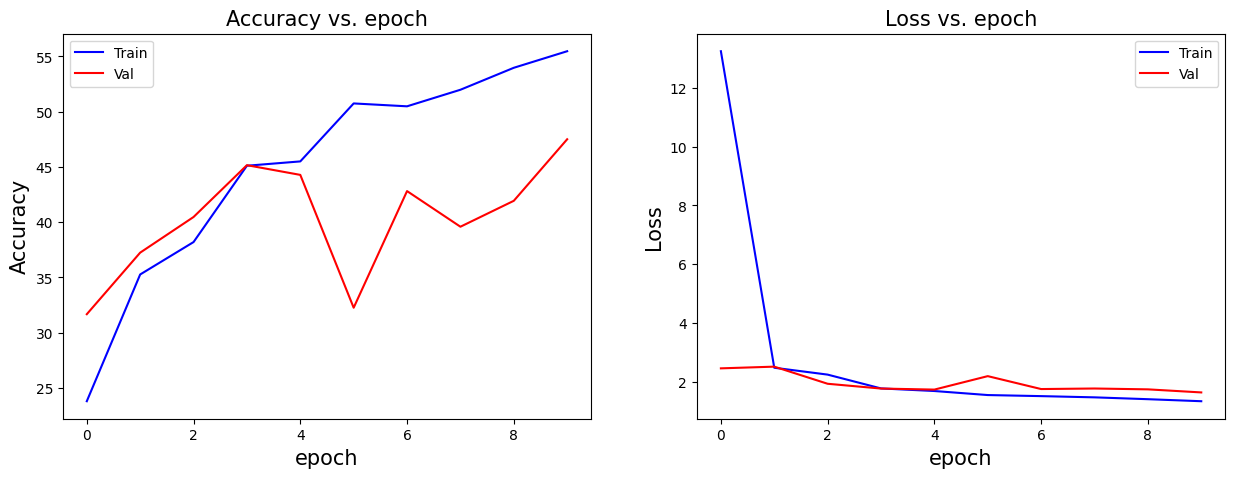

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
ax = axes.ravel()

#accuracy graph
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['accuracy']], label='Train', color='b')
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['val_accuracy']], label='Val', color='r')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['loss'], label='Train', color='b')
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['val_loss'], label='Val', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

In [17]:
n_classes = 10
hidden_size_2 = 256

model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters=16,kernel_size=3,strides=1,padding="same",activation="relu",input_shape=(h,w,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=hidden_size_2, activation='relu'),
    tf.keras.layers.Dense(units = n_classes, activation='softmax')

])

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 65536)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               16777472  
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 16,780,490
Trainable params: 16,780,490
Non-trainable params: 0
__________________________________________

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
epochs = 10
model_fit = model.fit(train_data, validation_data=val_data, epochs=epochs)

Epoch 1/10
96/96 [==============================] - 12s 43ms/step - loss: 2.3891 - accuracy: 0.3211 - val_loss: 1.7407 - val_accuracy: 0.4428
Epoch 2/10
96/96 [==============================] - 4s 41ms/step - loss: 1.3397 - accuracy: 0.5707 - val_loss: 1.6390 - val_accuracy: 0.4809
Epoch 3/10
96/96 [==============================] - 4s 43ms/step - loss: 0.8839 - accuracy: 0.7256 - val_loss: 1.5872 - val_accuracy: 0.4927
Epoch 4/10
96/96 [==============================] - 5s 46ms/step - loss: 0.5023 - accuracy: 0.8634 - val_loss: 1.5664 - val_accuracy: 0.4956
Epoch 5/10
96/96 [==============================] - 4s 44ms/step - loss: 0.2578 - accuracy: 0.9374 - val_loss: 1.7770 - val_accuracy: 0.5425
Epoch 6/10
96/96 [==============================] - 4s 43ms/step - loss: 0.1322 - accuracy: 0.9752 - val_loss: 1.7847 - val_accuracy: 0.5806
Epoch 7/10
96/96 [==============================] - 5s 45ms/step - loss: 0.0715 - accuracy: 0.9919 - val_loss: 1.7372 - val_accuracy: 0.6129
Epoch 8/10
9

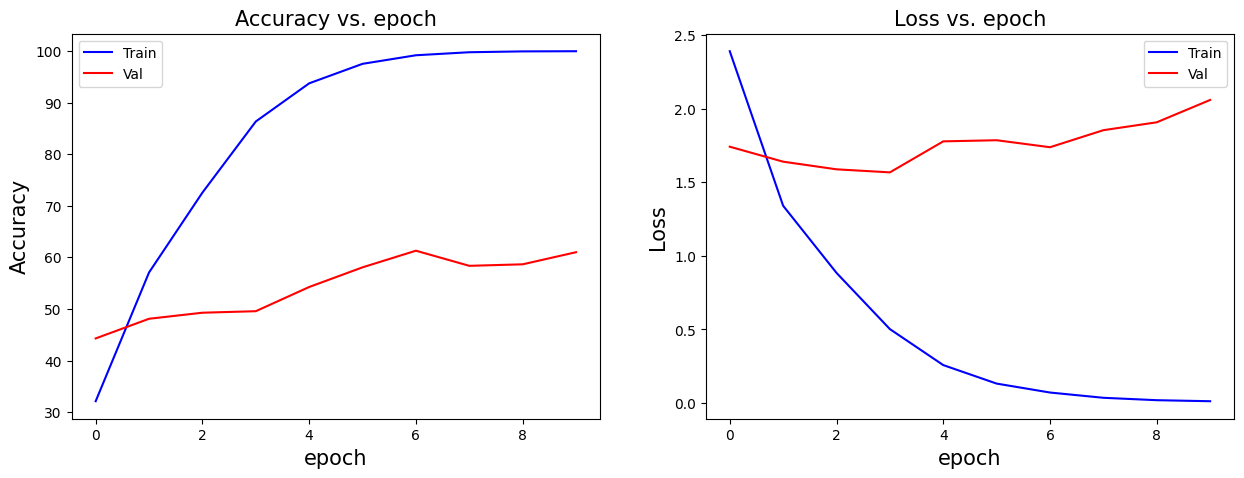

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
ax = axes.ravel()

#accuracy graph
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['accuracy']], label='Train', color='b')
ax[0].plot(range(0,model_fit.params['epochs']), [acc * 100 for acc in model_fit.history['val_accuracy']], label='Val', color='r')
ax[0].set_title('Accuracy vs. epoch', fontsize=15)
ax[0].set_ylabel('Accuracy', fontsize=15)
ax[0].set_xlabel('epoch', fontsize=15)
ax[0].legend()

#loss graph
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['loss'], label='Train', color='b')
ax[1].plot(range(0,model_fit.params['epochs']), model_fit.history['val_loss'], label='Val', color='r')
ax[1].set_title('Loss vs. epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_xlabel('epoch', fontsize=15)
ax[1].legend()

#display the graph
plt.show()

In [22]:
from sklearn.metrics import accuracy_score
true_categories = tf.concat([y for x, y in test_data], axis=0)
images = tf.concat([x for x, y in test_data], axis=0)
y_pred = model.predict(test_data)
#class_names = test_data.class_names
predicted_categories = tf.argmax(y_pred, axis=1)

test_acc = accuracy_score(true_categories, predicted_categories) * 100
print(f'\nTest Accuracy: {test_acc:.2f}%\n')

12/12 [==============================] - 1s 39ms/step

Test Accuracy: 12.37%



In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Activation, BatchNormalization

In [39]:
def arch1(height=128,width=128):
    n_classes = 10
    model = Sequential(
        [
           Conv2D(input_shape = (height, width,3),filters=16,kernel_size=3,padding="same",activation="relu"),
           Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"),
           Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"),
           Conv2D(filters=128,kernel_size=3,padding="same",activation="relu"),
           MaxPooling2D(),
           Conv2D(filters=256,kernel_size=3,padding="same",activation="relu"),
           MaxPooling2D(),
           GlobalAveragePooling2D(),
           Dense(units=n_classes,activation="softmax")
        ]
    )
    return model

In [40]:
model = arch1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 256)       295168    
                                                      

In [41]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [42]:
early_stopping = EarlyStopping(patience=2,monitor="val_accuracy")
ckpt_path = "C:\\Users\\gaura\\Documents\\GitHub\\Scaler-Projects\\Computer Vision\Revisting CNN Deal with Overfitting\\checkpoints"
model_chk_point = ModelCheckpoint(monitor="val_accuracy",save_best_only=True,filepath=ckpt_path)

In [44]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [45]:
hist = model.fit(train_data, validation_data=val_data, epochs=10,callbacks=[model_chk_point])

Epoch 1/10
96/96 [==============================] - ETA: 0s - loss: 2.1345 - accuracy: 0.2559

INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


96/96 [==============================] - 55s 438ms/step - loss: 2.1345 - accuracy: 0.2559 - val_loss: 2.1342 - val_accuracy: 0.2287
Epoch 2/10
96/96 [==============================] - ETA: 0s - loss: 2.0900 - accuracy: 0.2647

INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


96/96 [==============================] - 30s 312ms/step - loss: 2.0900 - accuracy: 0.2647 - val_loss: 2.1376 - val_accuracy: 0.2346
Epoch 3/10
96/96 [==============================] - ETA: 0s - loss: 2.0772 - accuracy: 0.2653

INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


96/96 [==============================] - 30s 311ms/step - loss: 2.0772 - accuracy: 0.2653 - val_loss: 2.1121 - val_accuracy: 0.2493
Epoch 4/10
96/96 [==============================] - ETA: 0s - loss: 2.0662 - accuracy: 0.2699

INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


96/96 [==============================] - 31s 317ms/step - loss: 2.0662 - accuracy: 0.2699 - val_loss: 2.1072 - val_accuracy: 0.2522
Epoch 5/10
96/96 [==============================] - 29s 305ms/step - loss: 2.0587 - accuracy: 0.2757 - val_loss: 2.0871 - val_accuracy: 0.2463
Epoch 6/10
96/96 [==============================] - 29s 303ms/step - loss: 2.0255 - accuracy: 0.2953 - val_loss: 2.0726 - val_accuracy: 0.2405
Epoch 7/10
96/96 [==============================] - ETA: 0s - loss: 1.9955 - accuracy: 0.3116

INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


96/96 [==============================] - 30s 314ms/step - loss: 1.9955 - accuracy: 0.3116 - val_loss: 2.0296 - val_accuracy: 0.3079
Epoch 8/10
96/96 [==============================] - 29s 304ms/step - loss: 1.9422 - accuracy: 0.3400 - val_loss: 2.0077 - val_accuracy: 0.3021
Epoch 9/10
96/96 [==============================] - ETA: 0s - loss: 1.8987 - accuracy: 0.3569

INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


96/96 [==============================] - 31s 317ms/step - loss: 1.8987 - accuracy: 0.3569 - val_loss: 1.9931 - val_accuracy: 0.3226
Epoch 10/10
96/96 [==============================] - ETA: 0s - loss: 1.8706 - accuracy: 0.3579

INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


96/96 [==============================] - 31s 316ms/step - loss: 1.8706 - accuracy: 0.3579 - val_loss: 1.9378 - val_accuracy: 0.3490


In [47]:
loss, val_loss , acc , val_acc = hist.history['loss'] , hist.history['val_loss'] , hist.history['accuracy'] , hist.history['val_accuracy'] 

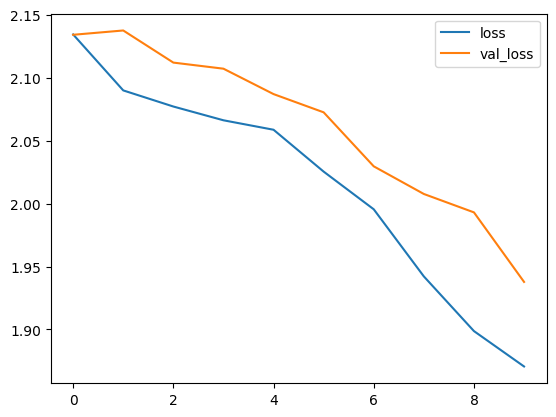

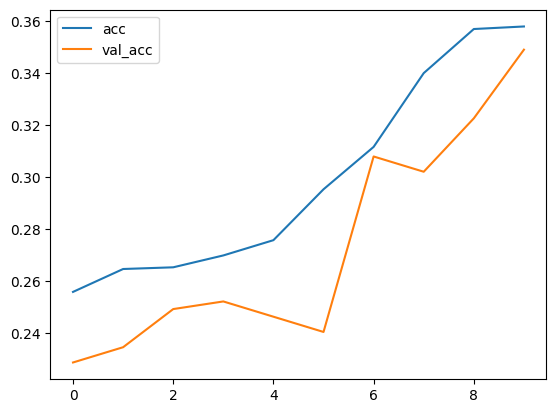

In [51]:
loss, val_loss , acc , val_acc = hist.history['loss'] , hist.history['val_loss'] , hist.history['accuracy'] , hist.history['val_accuracy'] 
plt.plot(loss,label = 'loss')
plt.plot(val_loss,label = 'val_loss')
plt.legend()
plt.show()

plt.plot(acc,label = 'acc')
plt.plot(val_acc,label = 'val_acc')
plt.legend()
plt.show()

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Activation, BatchNormalization, Dropout

In [63]:
def model_arc2(height=128,width=128):
    n_classes = 10
    model = Sequential([

        Conv2D(filters=16,input_shape=(height,width,3),kernel_size=3,padding="same"),
        Activation("relu"),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.2),
        
        Conv2D(filters=32,kernel_size=3,padding="same"),
        Activation("relu"),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.2),

        Conv2D(filters=64,kernel_size=3,padding="same"),
        Activation("relu"),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.2),
        Conv2D(filters=128,kernel_size=3,padding="same"),
        Activation("relu"),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.2),

        GlobalAveragePooling2D(),
        Dense(units=n_classes,activation="softmax")
    ])
    return model

In [64]:
model = model_arc2()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 activation_9 (Activation)   (None, 128, 128, 16)      0         
                                                                 
 batch_normalization_9 (Batc  (None, 128, 128, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 64, 64, 16)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 64, 64, 32)       

In [65]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [66]:
hist = model.fit(train_data, validation_data=val_data, epochs=10,callbacks=[model_chk_point])

Epoch 1/10
96/96 [==============================] - 6s 46ms/step - loss: 2.0073 - accuracy: 0.3184 - val_loss: 2.2518 - val_accuracy: 0.2111
Epoch 2/10
96/96 [==============================] - 4s 43ms/step - loss: 1.7356 - accuracy: 0.4179 - val_loss: 2.2406 - val_accuracy: 0.2375
Epoch 3/10
96/96 [==============================] - 4s 42ms/step - loss: 1.6177 - accuracy: 0.4606 - val_loss: 2.1759 - val_accuracy: 0.2669
Epoch 4/10
96/96 [==============================] - 4s 41ms/step - loss: 1.5153 - accuracy: 0.4954 - val_loss: 1.9666 - val_accuracy: 0.3138
Epoch 5/10
95/96 [============================>.] - ETA: 0s - loss: 1.4380 - accuracy: 0.5230

INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


96/96 [==============================] - 6s 59ms/step - loss: 1.4369 - accuracy: 0.5241 - val_loss: 1.8520 - val_accuracy: 0.3900
Epoch 6/10
96/96 [==============================] - ETA: 0s - loss: 1.3660 - accuracy: 0.5417

INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


96/96 [==============================] - 6s 62ms/step - loss: 1.3660 - accuracy: 0.5417 - val_loss: 1.6081 - val_accuracy: 0.4839
Epoch 7/10
96/96 [==============================] - ETA: 0s - loss: 1.3034 - accuracy: 0.5671

INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


96/96 [==============================] - 7s 67ms/step - loss: 1.3034 - accuracy: 0.5671 - val_loss: 1.4709 - val_accuracy: 0.5015
Epoch 8/10
96/96 [==============================] - 5s 46ms/step - loss: 1.2150 - accuracy: 0.5916 - val_loss: 1.7789 - val_accuracy: 0.3959
Epoch 9/10
96/96 [==============================] - 4s 45ms/step - loss: 1.1752 - accuracy: 0.6147 - val_loss: 1.5087 - val_accuracy: 0.5015
Epoch 10/10
96/96 [==============================] - ETA: 0s - loss: 1.1090 - accuracy: 0.6366

INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


96/96 [==============================] - 6s 64ms/step - loss: 1.1090 - accuracy: 0.6366 - val_loss: 1.4289 - val_accuracy: 0.5191


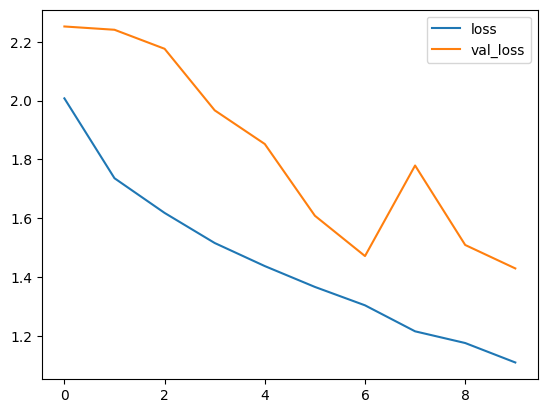

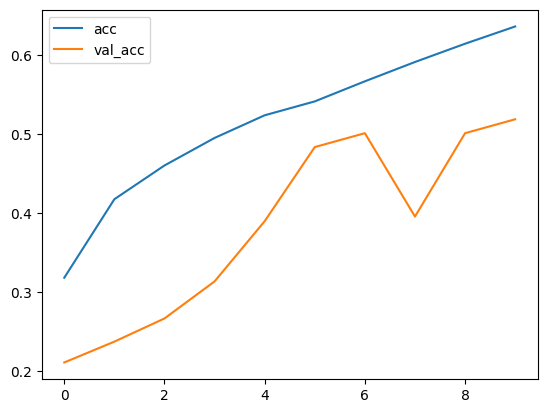

In [67]:
loss, val_loss , acc , val_acc = hist.history['loss'] , hist.history['val_loss'] , hist.history['accuracy'] , hist.history['val_accuracy'] 
plt.plot(loss,label = 'loss')
plt.plot(val_loss,label = 'val_loss')
plt.legend()
plt.show()

plt.plot(acc,label = 'acc')
plt.plot(val_acc,label = 'val_acc')
plt.legend()
plt.show()

In [7]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Activation, BatchNormalization, Dropout


early_stopping = EarlyStopping(patience=2,monitor="val_accuracy")
ckpt_path = "C:\\Users\\gaura\\Documents\\GitHub\\Scaler-Projects\\Computer Vision\Revisting CNN Deal with Overfitting\\checkpoints"
model_chk_point = ModelCheckpoint(monitor="val_accuracy",save_best_only=True,filepath=ckpt_path)

callbacks = [
ReduceLROnPlateau(monitor="val_loss",factor=0.3,patience=5),

ModelCheckpoint(monitor="val_accuracy",save_best_only=True,filepath=ckpt_path),

EarlyStopping(monitor="val_loss", patience=10, min_delta=0.001, mode='min')



]

def model_arc2(height=128,width=128):
    n_classes = 10
    model = Sequential([

        Conv2D(filters=16,input_shape=(height,width,3),kernel_size=3,padding="same"),
        Activation("relu"),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.2),
        
        Conv2D(filters=32,kernel_size=3,padding="same"),
        Activation("relu"),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.2),

        Conv2D(filters=64,kernel_size=3,padding="same"),
        Activation("relu"),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.2),
        Conv2D(filters=128,kernel_size=3,padding="same"),
        Activation("relu"),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.2),

        GlobalAveragePooling2D(),
        Dense(units=n_classes,activation="softmax")
    ])
    return model

model = model_arc2()

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
from tensorflow.keras.layers import Resizing,Rescaling,RandomContrast,RandomCrop,RandomFlip,RandomTranslation,RandomBrightness,RandomRotation

In [10]:
data_aug = Sequential([
    Resizing(128,128),
    Rescaling(1.0/255),
    RandomRotation(factor = (-0.2, 0.3)),
    RandomTranslation(
    height_factor = (-0.2, 0.3),
    width_factor = (-0.2, 0.3),
),
    RandomBrightness(factor=0.2),
    RandomContrast(factor=(0.5, 0.9)),
    RandomFlip(),

])

In [11]:
train_data = tf.keras.utils.image_dataset_from_directory("C:\\Users\\gaura\\Documents\\GitHub\\Scaler-Projects\\Computer Vision\\Introduction to Computer Vision(CNN)\\data\\clothing-dataset-small\\train",shuffle=True)
val_data = tf.keras.utils.image_dataset_from_directory("C:\\Users\\gaura\\Documents\\GitHub\\Scaler-Projects\\Computer Vision\\Introduction to Computer Vision(CNN)\\data\\clothing-dataset-small\\validation",shuffle=True)
test_data = tf.keras.utils.image_dataset_from_directory("C:\\Users\\gaura\\Documents\\GitHub\\Scaler-Projects\\Computer Vision\\Introduction to Computer Vision(CNN)\\data\\clothing-dataset-small\\test",shuffle=True)

train_ds = train_data.map(lambda x , y : (data_aug(x),y),num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

val_ds = val_data.map(
        lambda x, y: (data_aug(x), y), num_parallel_calls=tf.data.AUTOTUNE
    ).prefetch(tf.data.AUTOTUNE)
test_ds = test_data.map(
        lambda x, y: (data_aug(x), y), num_parallel_calls=tf.data.AUTOTUNE
    ).prefetch(tf.data.AUTOTUNE)


Found 3068 files belonging to 10 classes.
Found 341 files belonging to 10 classes.
Found 372 files belonging to 10 classes.


In [12]:
hist = model.fit(train_ds, validation_data=val_ds, epochs=100,callbacks=callbacks)

Epoch 1/100
96/96 [==============================] - ETA: 0s - loss: 2.0005 - accuracy: 0.3230

INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


96/96 [==============================] - 20s 114ms/step - loss: 2.0005 - accuracy: 0.3230 - val_loss: 2.3333 - val_accuracy: 0.1613 - lr: 0.0010
Epoch 2/100
96/96 [==============================] - ETA: 0s - loss: 1.7354 - accuracy: 0.4113

INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


96/96 [==============================] - 10s 100ms/step - loss: 1.7354 - accuracy: 0.4113 - val_loss: 2.2538 - val_accuracy: 0.2815 - lr: 0.0010
Epoch 3/100
95/96 [============================>.] - ETA: 0s - loss: 1.6313 - accuracy: 0.4572

INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


96/96 [==============================] - 9s 97ms/step - loss: 1.6298 - accuracy: 0.4583 - val_loss: 2.1803 - val_accuracy: 0.2903 - lr: 0.0010
Epoch 4/100
95/96 [============================>.] - ETA: 0s - loss: 1.4986 - accuracy: 0.5030

INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


96/96 [==============================] - 10s 100ms/step - loss: 1.5012 - accuracy: 0.5023 - val_loss: 1.8985 - val_accuracy: 0.3812 - lr: 0.0010
Epoch 5/100
95/96 [============================>.] - ETA: 0s - loss: 1.4088 - accuracy: 0.5289

INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


96/96 [==============================] - 9s 94ms/step - loss: 1.4065 - accuracy: 0.5293 - val_loss: 1.8221 - val_accuracy: 0.4076 - lr: 0.0010
Epoch 6/100
96/96 [==============================] - ETA: 0s - loss: 1.3534 - accuracy: 0.5629

INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


96/96 [==============================] - 10s 100ms/step - loss: 1.3534 - accuracy: 0.5629 - val_loss: 1.6079 - val_accuracy: 0.4633 - lr: 0.0010
Epoch 7/100
96/96 [==============================] - 7s 71ms/step - loss: 1.2773 - accuracy: 0.5838 - val_loss: 2.1465 - val_accuracy: 0.3109 - lr: 0.0010
Epoch 8/100
96/96 [==============================] - 7s 71ms/step - loss: 1.2343 - accuracy: 0.5949 - val_loss: 1.6691 - val_accuracy: 0.4399 - lr: 0.0010
Epoch 9/100
95/96 [============================>.] - ETA: 0s - loss: 1.1724 - accuracy: 0.6155

INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


96/96 [==============================] - 10s 101ms/step - loss: 1.1729 - accuracy: 0.6151 - val_loss: 1.4185 - val_accuracy: 0.5249 - lr: 0.0010
Epoch 10/100
96/96 [==============================] - 7s 69ms/step - loss: 1.1108 - accuracy: 0.6389 - val_loss: 1.4819 - val_accuracy: 0.5044 - lr: 0.0010
Epoch 11/100
96/96 [==============================] - ETA: 0s - loss: 1.0641 - accuracy: 0.6519

INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


96/96 [==============================] - 10s 105ms/step - loss: 1.0641 - accuracy: 0.6519 - val_loss: 1.2889 - val_accuracy: 0.5924 - lr: 0.0010
Epoch 12/100
96/96 [==============================] - 7s 74ms/step - loss: 1.0075 - accuracy: 0.6724 - val_loss: 1.3657 - val_accuracy: 0.5660 - lr: 0.0010
Epoch 13/100
95/96 [============================>.] - ETA: 0s - loss: 0.9697 - accuracy: 0.6780

INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


96/96 [==============================] - 10s 105ms/step - loss: 0.9691 - accuracy: 0.6786 - val_loss: 1.2997 - val_accuracy: 0.6100 - lr: 0.0010
Epoch 14/100
96/96 [==============================] - 7s 75ms/step - loss: 0.9160 - accuracy: 0.6965 - val_loss: 1.5159 - val_accuracy: 0.5220 - lr: 0.0010
Epoch 15/100
96/96 [==============================] - 8s 78ms/step - loss: 0.8760 - accuracy: 0.7125 - val_loss: 1.5857 - val_accuracy: 0.5073 - lr: 0.0010
Epoch 16/100
96/96 [==============================] - ETA: 0s - loss: 0.8562 - accuracy: 0.7174

INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


96/96 [==============================] - 11s 109ms/step - loss: 0.8562 - accuracy: 0.7174 - val_loss: 1.1919 - val_accuracy: 0.6422 - lr: 0.0010
Epoch 17/100
96/96 [==============================] - 8s 77ms/step - loss: 0.8036 - accuracy: 0.7438 - val_loss: 1.3051 - val_accuracy: 0.5601 - lr: 0.0010
Epoch 18/100
96/96 [==============================] - 8s 77ms/step - loss: 0.7603 - accuracy: 0.7591 - val_loss: 1.2936 - val_accuracy: 0.5865 - lr: 0.0010
Epoch 19/100
96/96 [==============================] - 7s 74ms/step - loss: 0.7328 - accuracy: 0.7764 - val_loss: 1.1914 - val_accuracy: 0.6041 - lr: 0.0010
Epoch 20/100
96/96 [==============================] - 7s 75ms/step - loss: 0.7153 - accuracy: 0.7728 - val_loss: 1.3413 - val_accuracy: 0.5689 - lr: 0.0010
Epoch 21/100
96/96 [==============================] - 7s 74ms/step - loss: 0.6815 - accuracy: 0.7787 - val_loss: 1.2813 - val_accuracy: 0.6070 - lr: 0.0010
Epoch 22/100
96/96 [==============================] - 7s 73ms/step - loss: 

INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


96/96 [==============================] - 10s 101ms/step - loss: 0.5835 - accuracy: 0.8139 - val_loss: 1.1696 - val_accuracy: 0.6481 - lr: 0.0010
Epoch 25/100
96/96 [==============================] - 7s 74ms/step - loss: 0.5639 - accuracy: 0.8272 - val_loss: 1.5145 - val_accuracy: 0.5396 - lr: 0.0010
Epoch 26/100
96/96 [==============================] - 7s 74ms/step - loss: 0.5364 - accuracy: 0.8387 - val_loss: 1.2370 - val_accuracy: 0.6100 - lr: 0.0010
Epoch 27/100
95/96 [============================>.] - ETA: 0s - loss: 0.5005 - accuracy: 0.8490

INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


96/96 [==============================] - 10s 103ms/step - loss: 0.5028 - accuracy: 0.8475 - val_loss: 1.0510 - val_accuracy: 0.6657 - lr: 0.0010
Epoch 28/100
96/96 [==============================] - 7s 70ms/step - loss: 0.4823 - accuracy: 0.8494 - val_loss: 1.2286 - val_accuracy: 0.6012 - lr: 0.0010
Epoch 29/100
96/96 [==============================] - 7s 75ms/step - loss: 0.4741 - accuracy: 0.8530 - val_loss: 1.2662 - val_accuracy: 0.5777 - lr: 0.0010
Epoch 30/100
96/96 [==============================] - 7s 72ms/step - loss: 0.4682 - accuracy: 0.8517 - val_loss: 1.1243 - val_accuracy: 0.6393 - lr: 0.0010
Epoch 31/100
96/96 [==============================] - 7s 72ms/step - loss: 0.4406 - accuracy: 0.8631 - val_loss: 1.1691 - val_accuracy: 0.6510 - lr: 0.0010
Epoch 32/100
96/96 [==============================] - 7s 74ms/step - loss: 0.4105 - accuracy: 0.8840 - val_loss: 1.1440 - val_accuracy: 0.6628 - lr: 0.0010
Epoch 33/100
96/96 [==============================] - ETA: 0s - loss: 0.339

INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


96/96 [==============================] - 10s 99ms/step - loss: 0.3393 - accuracy: 0.9055 - val_loss: 0.9520 - val_accuracy: 0.7185 - lr: 3.0000e-04
Epoch 34/100
96/96 [==============================] - 7s 69ms/step - loss: 0.3161 - accuracy: 0.9149 - val_loss: 1.0082 - val_accuracy: 0.6979 - lr: 3.0000e-04
Epoch 35/100
96/96 [==============================] - 7s 72ms/step - loss: 0.3010 - accuracy: 0.9234 - val_loss: 0.9219 - val_accuracy: 0.7155 - lr: 3.0000e-04
Epoch 36/100
96/96 [==============================] - 7s 72ms/step - loss: 0.2944 - accuracy: 0.9195 - val_loss: 0.9146 - val_accuracy: 0.7185 - lr: 3.0000e-04
Epoch 37/100
96/96 [==============================] - 7s 72ms/step - loss: 0.2742 - accuracy: 0.9316 - val_loss: 1.0265 - val_accuracy: 0.6921 - lr: 3.0000e-04
Epoch 38/100
96/96 [==============================] - 7s 72ms/step - loss: 0.2781 - accuracy: 0.9302 - val_loss: 0.9644 - val_accuracy: 0.6862 - lr: 3.0000e-04
Epoch 39/100
96/96 [==============================] 

INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


96/96 [==============================] - 10s 98ms/step - loss: 0.2622 - accuracy: 0.9368 - val_loss: 0.8821 - val_accuracy: 0.7243 - lr: 3.0000e-04
Epoch 41/100
96/96 [==============================] - ETA: 0s - loss: 0.2560 - accuracy: 0.9351

INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


96/96 [==============================] - 10s 99ms/step - loss: 0.2560 - accuracy: 0.9351 - val_loss: 0.9215 - val_accuracy: 0.7302 - lr: 3.0000e-04
Epoch 42/100
96/96 [==============================] - 7s 71ms/step - loss: 0.2462 - accuracy: 0.9361 - val_loss: 0.9864 - val_accuracy: 0.7067 - lr: 3.0000e-04
Epoch 43/100
96/96 [==============================] - 7s 74ms/step - loss: 0.2403 - accuracy: 0.9475 - val_loss: 0.9883 - val_accuracy: 0.7126 - lr: 3.0000e-04
Epoch 44/100
96/96 [==============================] - 7s 70ms/step - loss: 0.2402 - accuracy: 0.9420 - val_loss: 0.9629 - val_accuracy: 0.7126 - lr: 3.0000e-04
Epoch 45/100
96/96 [==============================] - 7s 73ms/step - loss: 0.2314 - accuracy: 0.9404 - val_loss: 0.9727 - val_accuracy: 0.6804 - lr: 3.0000e-04
Epoch 46/100
96/96 [==============================] - 7s 74ms/step - loss: 0.2269 - accuracy: 0.9456 - val_loss: 0.8676 - val_accuracy: 0.7126 - lr: 9.0000e-05
Epoch 47/100
96/96 [==============================] 

INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


96/96 [==============================] - 10s 98ms/step - loss: 0.2032 - accuracy: 0.9573 - val_loss: 0.8670 - val_accuracy: 0.7331 - lr: 9.0000e-05
Epoch 50/100
96/96 [==============================] - 7s 71ms/step - loss: 0.2086 - accuracy: 0.9547 - val_loss: 0.8608 - val_accuracy: 0.7185 - lr: 9.0000e-05
Epoch 51/100
96/96 [==============================] - 7s 73ms/step - loss: 0.1990 - accuracy: 0.9553 - val_loss: 0.8808 - val_accuracy: 0.7126 - lr: 9.0000e-05
Epoch 52/100
96/96 [==============================] - 7s 73ms/step - loss: 0.2025 - accuracy: 0.9553 - val_loss: 0.8718 - val_accuracy: 0.7302 - lr: 9.0000e-05
Epoch 53/100
96/96 [==============================] - 7s 72ms/step - loss: 0.1998 - accuracy: 0.9573 - val_loss: 0.8490 - val_accuracy: 0.7214 - lr: 2.7000e-05
Epoch 54/100
96/96 [==============================] - 7s 73ms/step - loss: 0.1952 - accuracy: 0.9573 - val_loss: 0.8435 - val_accuracy: 0.7302 - lr: 2.7000e-05
Epoch 55/100
96/96 [==============================] 

INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


INFO:tensorflow:Assets written to: C:\Users\gaura\Documents\GitHub\Scaler-Projects\Computer Vision\Revisting CNN Deal with Overfitting\checkpoints\assets


96/96 [==============================] - 10s 104ms/step - loss: 0.1854 - accuracy: 0.9619 - val_loss: 0.8455 - val_accuracy: 0.7361 - lr: 2.7000e-05
Epoch 56/100
96/96 [==============================] - 7s 73ms/step - loss: 0.1884 - accuracy: 0.9632 - val_loss: 0.8440 - val_accuracy: 0.7331 - lr: 2.7000e-05
Epoch 57/100
96/96 [==============================] - 7s 72ms/step - loss: 0.1966 - accuracy: 0.9583 - val_loss: 0.8407 - val_accuracy: 0.7361 - lr: 2.7000e-05


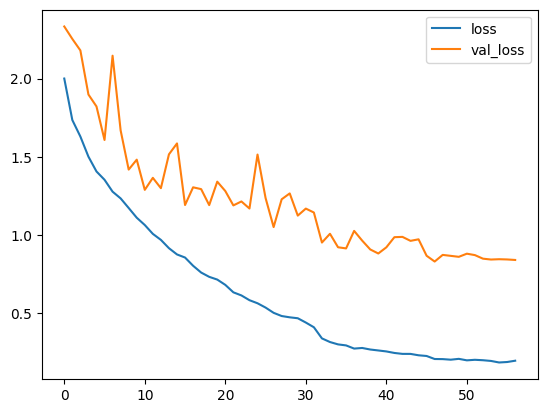

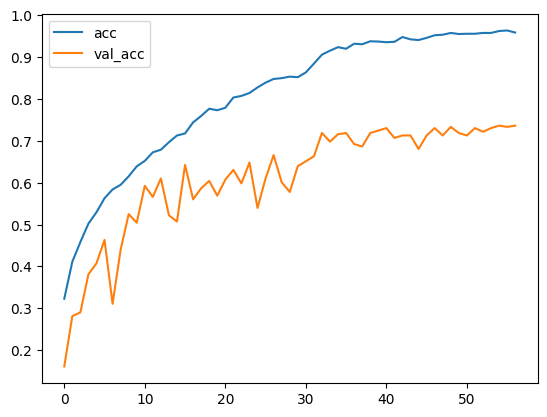

In [13]:
loss, val_loss , acc , val_acc = hist.history['loss'] , hist.history['val_loss'] , hist.history['accuracy'] , hist.history['val_accuracy'] 
plt.plot(loss,label = 'loss')
plt.plot(val_loss,label = 'val_loss')
plt.legend()
plt.show()

plt.plot(acc,label = 'acc')
plt.plot(val_acc,label = 'val_acc')
plt.legend()
plt.show()